# Machine learning for Real Estate project

This notebook is part of the Machine Learning (ML) project for sales of real estate properties for Mr William Bruns. It contains the following parts:
- Data importing and manipulation
- Understanding data through descriptive statistics
- Preparing data for the subsequent stage of building the ML algorithm (developed outside of this notebook).

## Import data

In [19]:
import pandas as pd

unsold = pd.read_csv("./data/NEWDATA.NOT SOLD.csv")
sold = pd.read_csv("./data/SOLD Property Docs.csv")

# TransferData is in another document, so import that one too
sold2 = pd.read_csv("./data/summary_sold.csv")

Drop un-needed columns, add a 'sold' column and print out a few lines of the data left.

In [20]:
sold['type'] = sold['DOCUMENT_TYPE_LEFT']
sold['date'] = sold['RECORDING_DATE']
sold['apn'] = sold['address_value']

unsold['type'] = unsold['DOCUMENT_TYPE_LEFT']
unsold['date'] = unsold['RECORDING_DATE']
unsold['apn'] = unsold['address_value']


sold.drop(['Unnamed: 5', 'DOCUMENT_TYPE_RIGHT', 'text_box_left', 
           'DOCUMENT_TYPE_LEFT', 'RECORDING_DATE', 'address_value'], axis=1, inplace=True)
unsold.drop(['Unnamed: 0', 'text_box_left', 'DOCUMENT_TYPE_RIGHT','ADDRESS', 'address_number_right', 'streetName_right',
       'PlaceName_right', 'StateName_right', 'ZipCode_right', 'OWNER_BORROWER',
       'SELLER_LENDER', 'text', 'parsed_name_address', 'parsed_name',
       'parsed_address', 'address_number', 'streetName', 'StreetNamePostType',
       'PlaceName', 'StateName', 'ZipCode', 'StreetNamePostType.1',
       'StreetNamePreDirectional', 'hash_value', 'is_parsed', 'address_index', 'Date', 'APN',
        'DOCUMENT_TYPE_LEFT', 'RECORDING_DATE', 'address_value'], 
        axis=1, inplace=True)

sold['sold'] = 1
unsold['sold'] = 0

In [21]:
unsold.head(5)

type       date         apn  sold
0  DEED OF TRUST   6/5/2001  439-092-16     0
1  DEED OF TRUST  3/11/2011  424-511-41     0
2  DEED OF TRUST  5/29/2009  422-353-10     0
3  DEED OF TRUST  1/27/2009  422-512-07     0
4  DEED OF TRUST  8/26/2003  426-071-06     0

In [58]:
sold.head(10)

type        date         apn  \
0   - HOME EQUITY LINE OF CREDIT DEED OF TRUST Pccm*  12/26/2001  804-401-34   
1  - Space Above This Line For Recording Dataâ?"D...   2/23/2006  126-241-08   
2                                  "34 DEED OF TRUST   1/30/2007  066-591-40   
3  "UTILITIES AND CABLE TELEVISION", OF THE DECLA...    7/7/2003  780-122-21   
4                              #[Space DEED OF TRUST   5/17/2004  386-094-06   
5             #2256 SUBSTITUTION OF TRUSTEE AND FULL   3/22/2017  932-711-95   
6  $ R 0 62 Sec2 S16 RO1 F14 1 0.00 0.00 0.00 0.0...   4/25/2017  780-122-21   
7                                  (01 DEED OF TRUST    2/9/2001  069-382-05   
8              (5â?"INTERSPOUSAL TRANSFER GRANT DEED   6/12/2002  937-896-55   
9  (9140,106,3673 DEED OF TRUST (With Future Adva...   8/18/2004  386-094-06   

   sold  
0     1  
1     1  
2     1  
3     1  
4     1  
5     1  
6     1  
7     1  
8     1  
9     1

## Explore data

### Number of properties, documents, distinct DOCUMENT_TYPE_LEFT entries

In [29]:
print("Number of documents in sold dataset:", len(sold))
print("Number of documents in unsold dataset:", len(unsold))
print("Number of unique sold properties:", len(sold.apn.unique()))
print("Number of unique unsold properties:", len(unsold.apn.unique()))
print("Number of unique DOCUMENT_TYPE_LEFT documents in sold dataset:", len(sold.type.unique()))
print("Number of unique DOCUMENT_TYPE_LEFT documents in unsold dataset:", len(unsold.type.unique()))

Number of documents in sold dataset: 9821
Number of documents in unsold dataset: 26128
Number of unique sold properties: 1960
Number of unique unsold properties: 3845
Number of unique DOCUMENT_TYPE_LEFT documents in sold dataset: 837
Number of unique DOCUMENT_TYPE_LEFT documents in unsold dataset: 118


The number of unique doc_type_left documents in the unsold dataset is much smaller than the one in the sold dataset. This probably means that the unsold document types are a subset of the sold ones. We'll see later how this affects our feature selection. Let's count the unique doc_type_left entries..

<div color="red">The client has claimed that the combination of: 1) lien, 2)notice of default and 3)notice of trustee sale is a good indicator of a sale event.</div>

In [57]:
from collections import Counter
counter = Counter(sold.type)
l = counter.most_common()
for ll in l:
    text = ll[0]
#     print(text)
    if type(text) == str and 'LIEN' in text:
        print(text)


LIEN
NOTICE OF DELINQUENT ASSESSMENT (LIEN)
DISCHARGE OF ASSESSMENT LIEN
AND NOTICE OF CLAIM OF LIEN
NOTICE OF DEFAULT AND ELECTION TO SELL UNDER HOMEOWNERS ASSOCIATION LIEN
NOTICE OF DELINQUENT ASSESSMENT AND CLAIM OF LIEN
RELEASE OF ASSESSMENT LIEN
DELINQUENT ASSESSMENT AND NOTICE OF CLAIM OF LIEN
RELEASE OF NOTICE OF DELINQUENT ASSESSMENTS AND CLAIM OF LIEN
SUBORDINATION OF LIEN
MECHANICS LIEN (CLAIM OF LIEN)
NOTICE OF CLAIM OF LIEN
NOTICE OF DEFAULT AND ELECTION TO SELL FOR DEFAULT IN PAYMENT OF ASSESSMENT LIEN
NOTICE OF DEFAULT AND ELECTION TO SELL UNDER NOTICE OF DELINQUENT ASSESSMENT LIEN
NOTICE OF DELINQUENT ASSESSMENT AND CLAIM OF LIEN UPON REAL PROPERTY
NOTICE OF DELINQUENT ASSESSMENT LIEN
NOTICE OF LIEN FOR POSTPONED PROPERTY TAXES
NOTICE OF RELEASE OF LIEN
NOTICE OF STATE TAX LIEN
RELEASE OF DELINQUENT ASSESSMENT LIEN
RELEASE OF NOTICE OF DELINQUENT ASSESSMENT LIEN


### Number of documents per property

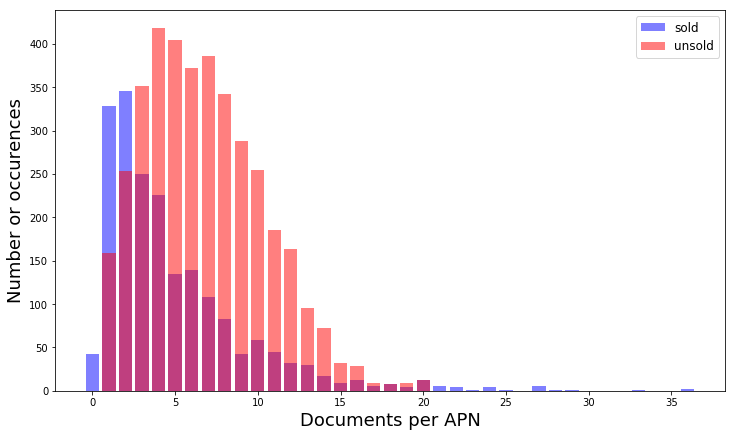

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

sold_apn = sold.groupby("apn").count()
unsold_apn = unsold.groupby("apn").count()
counter1 = Counter(sold_apn.type)
counter2 = Counter(unsold_apn.type)
plt.bar(list(counter1.keys()), list(counter1.values()), alpha=0.5, color='blue', label='sold')
plt.bar(list(counter2.keys()), list(counter2.values()), alpha=0.5, color='red', label='unsold')
plt.xlabel("Documents per APN", size=18)
plt.ylabel("Number or occurences", size=18)
plt.legend(fontsize=12)

In [25]:
import numpy as np

print("[Sold properties] median: %.2f, mode: %.2f" % (np.median(sold_apn.type), counter1.most_common(1)[0][0]))
print("[Unsold properties] median: %.2f, mode: %.2f" % (np.median(unsold_apn.type), counter2.most_common(1)[0][0]))

[Sold properties] median: 4.00, mode: 2.00
[Unsold properties] median: 6.00, mode: 4.00


The above figure shows the distribution of number od documents per property (APN), for sold and unsold properties. Clearly, unsold properties have more documents per property (with median of 6) than sold ones (median of 4). The 'number of documents per property' seems like a good indicator of a sale event, but the client has decided that it shouldn't be used in the ML algorithm.

### Distinct entries in DOCUMENT_TYPE_LEFT

In [27]:
len(sold.type.unique())

837